# ICA using FastICA Algorithm inbuilt

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

### Genrating three sample sources

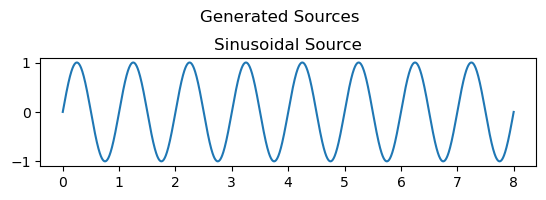

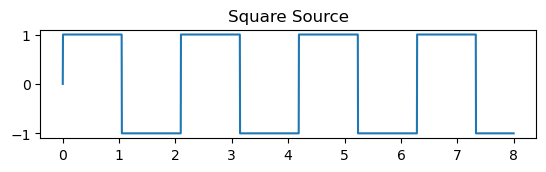

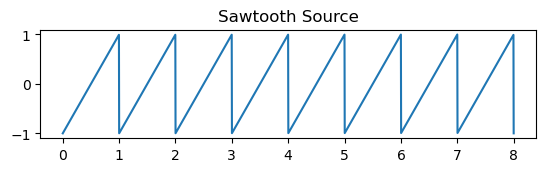

In [59]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

w = 2*np.pi
f1 = 1
f2 = 2
f3 = 3

s1 = np.sin(w * f1* time)  # Signal 1 : sinusoidal signal
#s2 = np.sin(w*f2*time)
#s3 = np.sin(w*f3*time)
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal


plt.suptitle("Generated Sources")

plt.subplot(3, 1, 1)
plt.plot(time, s1)
plt.title("Sinusoidal Source")
plt.show()

plt.subplot(3, 1, 2)
plt.plot(time, s2)
plt.title("Square Source")
plt.show()

plt.subplot(3, 1, 3)
plt.plot(time, s3)
plt.title("Sawtooth Source")
plt.show()

### Adding Noise

In [43]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
print(S)

[[ 0.35281047  0.08003144 -0.8042524 ]
 [ 0.4733213   1.3735116  -1.18745157]
 [ 0.24028712  0.96972856 -1.00463577]
 ...
 [-0.05251226 -0.73104792  0.81769352]
 [-0.10673703 -1.26616078  1.06251572]
 [-0.10757695 -0.92131111 -0.94269635]]


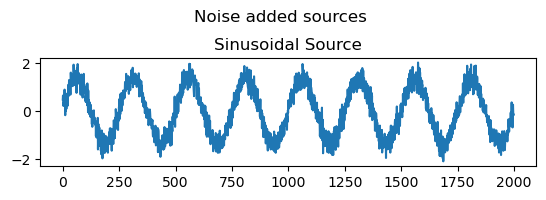

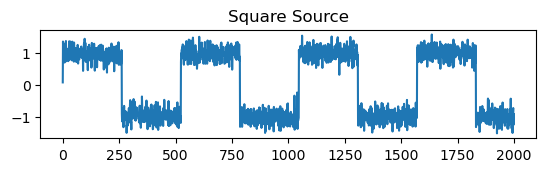

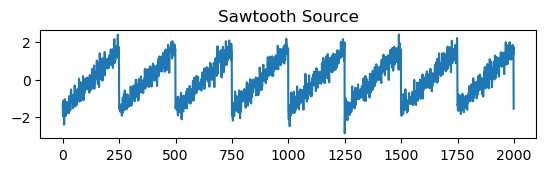

In [68]:
a, b, c = S.T
x = np.arange(len(a))

plt.suptitle("Noise added sources")

plt.subplot(3, 1, 1)
plt.plot(x, a)
plt.title("Sinusoidal Source")
plt.show()

plt.subplot(3, 1, 2)
plt.plot(x, b)
plt.title("Square Source")
plt.show()

plt.subplot(3, 1, 3)
plt.plot(x, c)
plt.title("Sawtooth Source")
plt.show()

### Taking some mixing matrix and generating observations X

In [44]:
S /= S.std(axis=0)  # Standardize data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)

### Computing ICA

In [45]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

### Plotting the sources

In [62]:
print(S_)
a, b, c = S_.T

[[-0.02907632  0.01498593 -0.0001584 ]
 [-0.04434357  0.01995474  0.02776554]
 [-0.04320813  0.01285449  0.01910853]
 ...
 [ 0.04090772 -0.00668912 -0.01600303]
 [ 0.05157205 -0.00948094 -0.02744971]
 [-0.05297773  0.00470904 -0.02234229]]


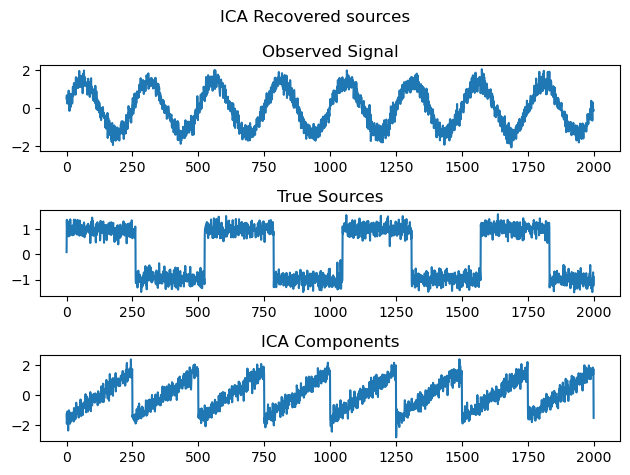

In [70]:
x = np.arange(len(a))

plt.suptitle("ICA Recovered sources")


plt.subplot(3, 1, 1)
plt.plot(x, a)
plt.title("Observed Signal")

plt.subplot(3, 1, 2)
plt.plot(x, b)
plt.title("True Sources")

plt.subplot(3, 1, 3)
plt.plot(x, c)
plt.title("ICA Components")

plt.tight_layout()
plt.show()